In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, glob

In [517]:
from IPython.display import display_html

#  command for viewing dataframes side by side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Goal: Determine Fragment Analysis Sensitivity to Parameters
Parameters are:
- Cutoff
- Easy Limit
- Hard Limit

Fragment analysis  has been run on *Lipophilicity-ID.csv* dataset with systematic variations in the above parameters.


## Metrics

I will use number of relationships and *difficulty* as metrics of the analysis stability.  Specifically, I am looking at
how these metrics change with respect to the above parameters.  Is it a smooth change?  Does the metric have a sharp
change at some point in the parameter space?

I expect there to be a semi-sharp change in number of relationships as outliers become included in the fragment analysis.

In [518]:
def df_cleanup(df):
    df = df.rename(columns={'number_of_rel': 'rels'})
    df = df.drop(columns=['sum_difficulty'])
    return df

In [519]:
path = 'results/'
prefix = 'FragAnalysis_Lipophilicity-ID'
cut_str = '0.775'
easy_str = '0.1'
hard_str = '0.1'
file_str = path + prefix + '_' + cut_str + '_' + easy_str + '_' +hard_str +'.csv'
print(file_str)

results/FragAnalysis_Lipophilicity-ID_0.775_0.1_0.1.csv


In [520]:
a = df_cleanup(pd.read_csv(file_str))
a.sort_values(by="avg_difficulty", ascending=False).head(15)

,Unnamed: 0,fragment,rels,avg_difficulty
428,428,CC(<-C(=O)O>)<-N>,1,3.334416
429,429,CC(<-C(=O)O>)<-N>C,1,3.334416
430,430,C(<-C(=O)O>)<-N>CO,1,3.334416
431,431,COP(<-O>)(<-O>)<=O>,1,3.334416
432,432,CC(<-C(=O)O>)<-N>CO,1,3.334416
433,433,C(<-C(=O)O>)<-N>COP(<-O>)(<-O>)<=O>,1,3.334416
434,434,CC(<-C(=O)O>)<-N>COP(<-O>)(<-O>)<=O>,1,3.334416
96,96,OP(<-O>)(<-O>)<=O>,2,2.852950
463,463,c[n+]c(C)n,1,2.791796
458,458,C[n+]cNC,1,2.791796


In [521]:
rels_diff = a.sort_values(by="avg_difficulty", ascending=False)["rels"].iloc[0]
print("Rels of highest difficulty fragment:", rels_diff)

diff_max = a.sort_values(by="avg_difficulty", ascending=False)["avg_difficulty"].iloc[0]
print("Highest Difficulty:", diff_max)

rels_max = a.sort_values(by="rels", ascending=False)["rels"].iloc[0]
print("Highest number of Relationships:", rels_max)

diff_rels = a.sort_values(by="rels", ascending=False)["avg_difficulty"].iloc[0]
print('Difficulty of Fragment with most relationships:',diff_rels)

fCount = a.shape[0]
print('Number of fragments returned:',fCount)

Rels of highest difficulty fragment: 1
Highest Difficulty: 3.3344159115007703
Highest number of Relationships: 5
Difficulty of Fragment with most relationships: 1.3952060294730335
Number of fragments returned: 1854


In [522]:
def getFiles():
    filenames = [] # empty list for running list of files
    for file in glob.glob(path + prefix +'*.csv'): # get every .out file in current working directory
        # print(file)
        filenames.append(file) # add file name to list



    file_df = pd.DataFrame([], columns =['Data', 'Cutoff', 'Easy_Limit', 'Hard_Limit', ])


    #define regex pattern
    rx_file = re.compile(r'''FragAnalysis_(?P<data>Lipophilicity-ID)_(?P<cutoff>.*?)_(?P<easy>.*?)_(?P<hard>.*?).csv''')

    for file in filenames:
        # search file for regex pattern
        file_res = rx_file.search(file)

        #save info found in regex search to variables
        data = file_res.group('data')

        cutoff = float(file_res.group('cutoff'))
        easy = float(file_res.group('easy'))
        hard = float(file_res.group('hard'))

        df = pd.read_csv(file)
        if df.empty:  # no fragments returned
            info = {'Data': data, # The dataset
                'Cutoff': cutoff,  # The cutoff parameter
                'Easy_Limit': easy,  # The number of Easy fragments
                'Hard_Limit': hard,  # The number of Hard fragments
                'Max_Rels': 0,  # Max number of relationships on a hard frag
                'Max_Rels_Difficulty': 0, # the difficulty of must frequent frag
                'Max_Difficulty': 0,  # highest difficulty of frag
                'Max_Difficulty_Rels': 0,  # number of rels for most difficult frag
                'Frag_Count': 0  # how many fragments the analysis returned

                }
#             info = {'Data': data, # The dataset
#                 'Cutoff': cutoff,  # The cutoff parameter
#                 'Easy_Limit': easy,  # The number of Easy fragments
#                 'Hard_Limit': hard,  # The number of Hard fragments
#                 'Max_Rels': None,  # Max number of relationships on a hard frag
#                 'Max_Rels_Difficulty': None, # the difficulty of must frequent frag
#                 'Max_Difficulty': None,  # highest difficulty of frag
#                 'Max_Difficulty_Rels': None,  # number of rels for most difficult frag
#                 'Frag_Count': 0  # how many fragments the analysis returned

#                 }
        else:
            df = df_cleanup(df)
            rels_diff = df.sort_values(by="avg_difficulty", ascending=False)["rels"].iloc[0]
            diff_max = df.sort_values(by="avg_difficulty", ascending=False)["avg_difficulty"].iloc[0]
            rels_max = df.sort_values(by="rels", ascending=False)["rels"].iloc[0]
            diff_rels = df.sort_values(by="rels", ascending=False)["avg_difficulty"].iloc[0]
            fCount = df.shape[0]

            info = {'Data': data, # The dataset
                    'Cutoff': cutoff,  # The cutoff parameter
                    'Easy_Limit': easy,  # The number of Easy fragments
                    'Hard_Limit': hard,  # The number of Hard fragments
                    'Max_Rels': rels_max,  # Max number of relationships on a hard frag
                    'Max_Rels_Difficulty': diff_rels, # the difficulty of must frequent frag
                    'Max_Difficulty': diff_max,  # highest difficulty of frag
                    'Max_Difficulty_Rels': rels_diff,  # number of rels for most difficult frag
                    'Frag_Count': fCount  # how many fragments the analysis returned
                    }
        file_df = file_df.append(info, ignore_index=True)
        
        # print(data, cutoff, easy, hard)






    return filenames, file_df

In [523]:
files, df = getFiles()


In [524]:
df.describe()

,Cutoff,Easy_Limit,Hard_Limit,Frag_Count,Max_Difficulty,Max_Difficulty_Rels,Max_Rels,Max_Rels_Difficulty
count,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000
mean,0.782019,0.199518,0.219953,3003.471319,2.863977,3.130855,24.408954,1.277502
std,0.142577,0.177717,0.158197,2327.166362,0.838101,8.008851,32.020124,0.511735
min,0.500000,0.001000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.675000,0.003000,0.078000,931.000000,2.852950,1.000000,4.000000,0.998252
50%,0.800000,0.175000,0.175000,2836.000000,3.334416,1.000000,8.000000,1.152248
75%,0.900000,0.350000,0.350000,4750.000000,3.334416,2.000000,57.000000,1.449097
max,1.000000,0.525000,0.525000,10669.000000,3.334416,133.000000,231.000000,2.852950


In [525]:
df = df.dropna()
df.sort_values(by=['Cutoff', 'Easy_Limit', 'Hard_Limit']).head(15)

,Data,Cutoff,Easy_Limit,Hard_Limit,Frag_Count,Max_Difficulty,Max_Difficulty_Rels,Max_Rels,Max_Rels_Difficulty
3794,Lipophilicity-ID,0.5,0.05,0.050,3295.0,3.143136,1.0,13.0,1.246629
3630,Lipophilicity-ID,0.5,0.05,0.075,7161.0,3.334416,1.0,13.0,1.246629
4510,Lipophilicity-ID,0.5,0.05,0.100,8430.0,3.334416,1.0,13.0,1.246629
8625,Lipophilicity-ID,0.5,0.05,0.125,8430.0,3.334416,1.0,13.0,1.246629
8626,Lipophilicity-ID,0.5,0.05,0.150,8430.0,3.334416,1.0,13.0,1.246629
3691,Lipophilicity-ID,0.5,0.05,0.175,8430.0,3.334416,1.0,13.0,1.246629
1809,Lipophilicity-ID,0.5,0.05,0.200,8430.0,3.334416,1.0,13.0,1.246629
376,Lipophilicity-ID,0.5,0.05,0.225,8430.0,3.334416,1.0,13.0,1.246629
8213,Lipophilicity-ID,0.5,0.05,0.250,8430.0,3.334416,1.0,13.0,1.246629
9315,Lipophilicity-ID,0.5,0.05,0.275,8430.0,3.334416,1.0,13.0,1.246629


In [526]:
df.describe()

,Cutoff,Easy_Limit,Hard_Limit,Frag_Count,Max_Difficulty,Max_Difficulty_Rels,Max_Rels,Max_Rels_Difficulty
count,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000
mean,0.782019,0.199518,0.219953,3003.471319,2.863977,3.130855,24.408954,1.277502
std,0.142577,0.177717,0.158197,2327.166362,0.838101,8.008851,32.020124,0.511735
min,0.500000,0.001000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.675000,0.003000,0.078000,931.000000,2.852950,1.000000,4.000000,0.998252
50%,0.800000,0.175000,0.175000,2836.000000,3.334416,1.000000,8.000000,1.152248
75%,0.900000,0.350000,0.350000,4750.000000,3.334416,2.000000,57.000000,1.449097
max,1.000000,0.525000,0.525000,10669.000000,3.334416,133.000000,231.000000,2.852950


In [527]:
df.sort_values(by='Max_Difficulty').head(15)

,Data,Cutoff,Easy_Limit,Hard_Limit,Frag_Count,Max_Difficulty,Max_Difficulty_Rels,Max_Rels,Max_Rels_Difficulty
9171,Lipophilicity-ID,0.975,0.325,0.050,0.0,0.0,0.0,0.0,0.0
537,Lipophilicity-ID,0.920,0.003,0.008,0.0,0.0,0.0,0.0,0.0
10435,Lipophilicity-ID,0.965,0.003,0.010,0.0,0.0,0.0,0.0,0.0
8484,Lipophilicity-ID,0.980,0.003,0.012,0.0,0.0,0.0,0.0,0.0
528,Lipophilicity-ID,0.975,0.050,0.050,0.0,0.0,0.0,0.0,0.0
9626,Lipophilicity-ID,0.880,0.003,0.005,0.0,0.0,0.0,0.0,0.0
1818,Lipophilicity-ID,0.950,0.300,0.050,0.0,0.0,0.0,0.0,0.0
4807,Lipophilicity-ID,0.835,0.003,0.005,0.0,0.0,0.0,0.0,0.0
8500,Lipophilicity-ID,0.995,0.003,0.008,0.0,0.0,0.0,0.0,0.0
11263,Lipophilicity-ID,0.975,0.002,0.025,0.0,0.0,0.0,0.0,0.0


## Plots

The data is collected.  Lets see what we can plot from here.
First, lets look at *cutoff* and *Max_Difficulty*


In [528]:
def plotter(x, y, filename=None, xlabel='', ylabel=''):
    """
    General plotting function for creating an XY scatter plot.
    Accepts x-axis data and y-axis data as (numpy or pd.Series or lists?)
    Returns graph object.  If filename keyword is given, will save to file (PNG)
    ____________________________
    Keyword Arguments
    filename:  None or string. Default = None.  Specify filename for saving to PNG file.  Do not include extension.
    xlabel: string. Default = ''.  X-axis label.
    ylabel: string. Default = ''.  Y-axis label.

    """

    plt.rcParams['figure.figsize'] = [12, 9]
    plt.style.use('bmh')
    fig, ax = plt.subplots()
    plt.plot(x, y, 'o')
    # ax = plt.axes()
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(filename)
    # ax.legend(prop={'size': 16}, facecolor='w', edgecolor='k', shadow=True)
    fig.patch.set_facecolor('blue')  # Will change background color
    fig.patch.set_alpha(0.0)  # Makes background transparent

    if filename is not None:
        plt.savefig(filename + '.png')

    plt.show()

def series_plotter(data, filename=None, xlabel='', ylabel=''):
    """
    General plotting function for creating an XY scatter plot.
    Accepts x-axis data and y-axis data as dictionary of tupled series.
    Returns graph object.  If filename keyword is given, will save to file (PNG)
    ____________________________
    Keyword Arguments
    filename:  None or string. Default = None.  Specify filename for saving to PNG file.  Do not include extension.
    xlabel: string. Default = ''.  X-axis label.
    ylabel: string. Default = ''.  Y-axis label.

    """
    plt.rcParams['figure.figsize'] = [12, 9]
    plt.style.use('bmh')
    fig, ax = plt.subplots()

    for key, value in data.items():
        x = value[0]
        y = value[1]
        plt.plot(x, y, value[2], label=key)


    # ax = plt.axes()
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(filename)
    plt.legend()
    # ax.legend(prop={'size': 16}, facecolor='w', edgecolor='k', shadow=True)
    fig.patch.set_facecolor('blue')  # Will change background color
    fig.patch.set_alpha(0.0)  # Makes background transparent

    if filename is not None:
        plt.savefig(filename + '.png')

    plt.show()

### Cutoff vs Max Difficulty
Holding the *Easy_Limit* and *Hard_Limit* constant at 0.1 (top 10%) for this analysis.
We could have multiple series of different values of these parameters.

In [529]:
df2 = df.loc[(df['Easy_Limit'] == 0.1) & (df['Hard_Limit'] == 0.1)]
# df2.head(15)

In [530]:
df3 = df.loc[(df['Easy_Limit'] == 0.5) & (df['Hard_Limit'] == 0.5)]
# df3.head(15)

In [531]:
df4 = df.loc[(df['Easy_Limit'] == 0.1) & (df['Hard_Limit'] == 0.5)]
# df4.head(15)

In [532]:
df5 = df.loc[(df['Easy_Limit'] == 0.5) & (df['Hard_Limit'] == 0.1)]
df6 = df.loc[(df['Easy_Limit'] == 0.25) & (df['Hard_Limit'] == 0.25)]

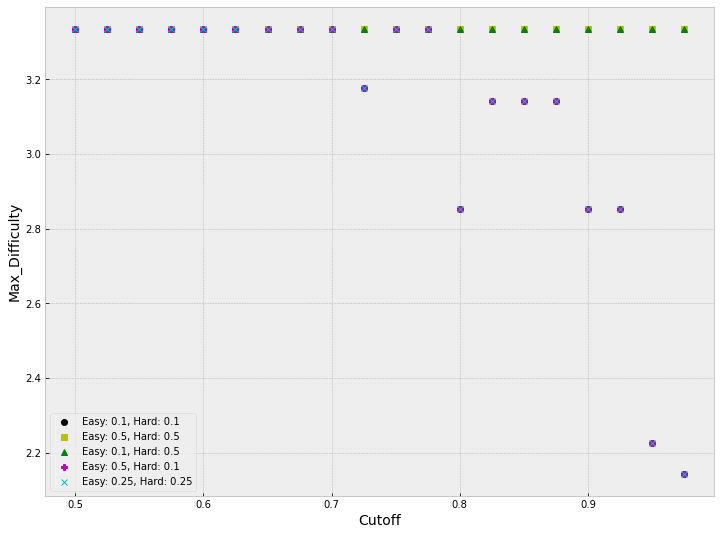

In [533]:
# plotter(df2['Cutoff'], df2['Max_Difficulty'], xlabel='Cutoff', ylabel= 'Max_Difficulty')
data = {'Easy: 0.1, Hard: 0.1': (df2['Cutoff'], df2['Max_Difficulty'], 'ko'),
        'Easy: 0.5, Hard: 0.5': (df3['Cutoff'], df3['Max_Difficulty'], 'ys'),
        'Easy: 0.1, Hard: 0.5': (df4['Cutoff'], df4['Max_Difficulty'], 'g^'),
        'Easy: 0.5, Hard: 0.1': (df5['Cutoff'], df5['Max_Difficulty'], 'mP'),
        'Easy: 0.25, Hard: 0.25': (df5['Cutoff'], df5['Max_Difficulty'], 'cx')
        }
series_plotter(data, xlabel='Cutoff', ylabel= 'Max_Difficulty')

### Cutoff vs Max Relationships

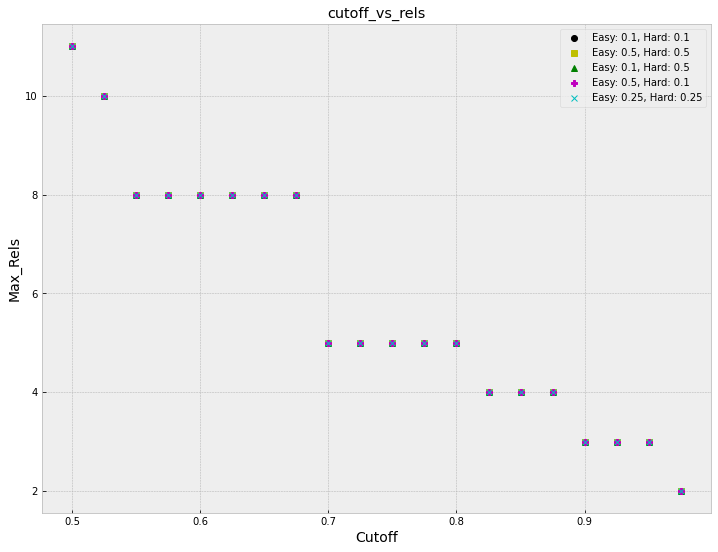

In [534]:
data2 = {'Easy: 0.1, Hard: 0.1': (df2['Cutoff'], df2['Max_Rels'], 'ko'),
        'Easy: 0.5, Hard: 0.5': (df3['Cutoff'], df3['Max_Rels'], 'ys'),
        'Easy: 0.1, Hard: 0.5': (df4['Cutoff'], df4['Max_Rels'], 'g^'),
        'Easy: 0.5, Hard: 0.1': (df5['Cutoff'], df5['Max_Rels'], 'mP'),
        'Easy: 0.25, Hard: 0.25': (df5['Cutoff'], df5['Max_Rels'], 'cx')
        }
series_plotter(data2, xlabel='Cutoff', ylabel= 'Max_Rels',filename='cutoff_vs_rels')

## Surface of how many fragments are returned by the analysis
Lets fix *Cutoff* and look at the effect of the *Limits*
I may try to make a slider of this to change cutoff...

In [560]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def surface(x,y,z, xlabel='', ylabel='', zlabel='', ang = 300, filename=None):
    # plt.rcParams['figure.figsize'] = [12, 9]
    # plt.style.use('bmh')
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(x, y, z, cmap=cm.plasma, linewidth=0.9, antialiased=True)
    # fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_zlabel(zlabel, fontsize=14)
    ax.view_init(elev=25., azim= ang)
    fig.patch.set_facecolor('blue')  # Will change background color
    # fig.patch.set_alpha(0.0)
    ax.set(facecolor='w')
    fig.set(facecolor='w')
    
    plt.xlim([25, 50])

    if filename is not None:
        plt.savefig(filename + '.png', transparent=True)

    plt.show()

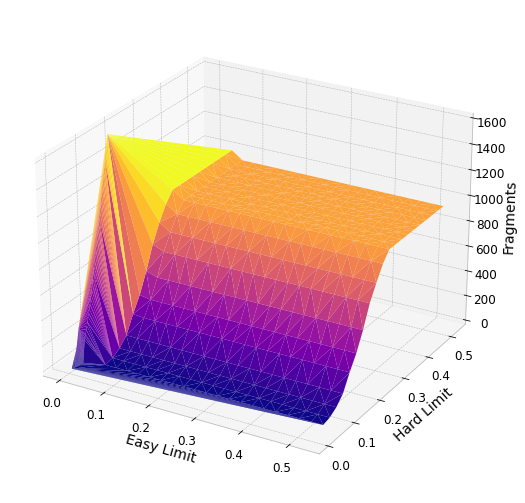

In [536]:
sData = df.loc[(df['Cutoff'] == 0.95)]

# Use azim = 300 for good graph
surface(sData['Easy_Limit'], sData['Hard_Limit'], sData['Frag_Count'],
        xlabel='Easy Limit', ylabel="Hard Limit",zlabel='Fragments', ang=300,
        filename='easy_vs_hard')

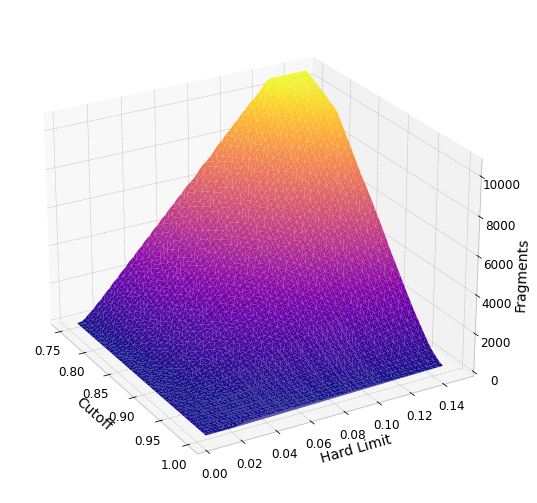

In [568]:
sData2 = df.loc[(df['Easy_Limit'] == 0.003)]
# print(sData['Frag_Count'])
surface(sData2['Cutoff'], sData2['Hard_Limit'], sData2['Frag_Count'],
        xlabel='Cutoff', ylabel="Hard Limit",zlabel='Fragments', ang=330,
        filename='cutoff_vs_hard')

In [538]:
sData2['Max_Difficulty'].max()

3.3344159115007703

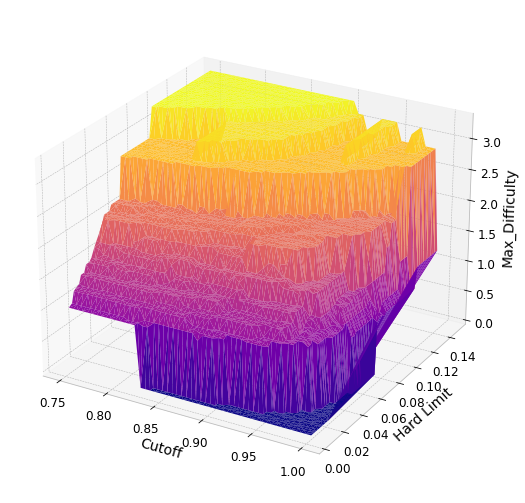

In [569]:
surface(sData2['Cutoff'], sData2['Hard_Limit'], sData2['Max_Difficulty'],
        xlabel='Cutoff', ylabel="Hard Limit",zlabel='Max_Difficulty', ang=300,
        filename='cutoff_vs_hard_diff')

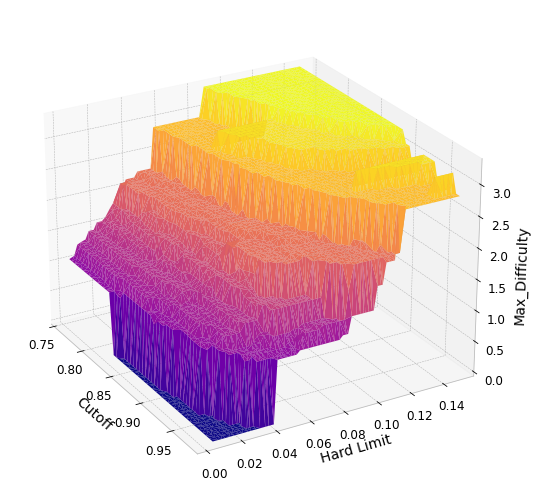

In [614]:
sDataX = sData2.loc[(sData2['Cutoff'] <= 0.985)]
x = sDataX['Cutoff']
y = sDataX['Hard_Limit']
z = sDataX['Max_Difficulty']
xlabel='Cutoff'
ylabel="Hard Limit"
zlabel='Max_Difficulty'
ang=330
filename='cutoff_vs_hard_diff2'
xlim = (0.75, 0.985)


fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(x, y, z, cmap=cm.plasma, linewidth=0.01, antialiased=True, edgecolors='gray')
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_zlabel(zlabel, fontsize=14)
ax.view_init(elev=25., azim= ang)
fig.patch.set_facecolor('blue')  # Will change background color
# fig.patch.set_alpha(0.0)
ax.set(facecolor='w')
fig.set(facecolor='w')

plt.xlim([0.75, 0.985])

if filename is not None:
    plt.savefig(filename + '.png', transparent=True)

plt.show()

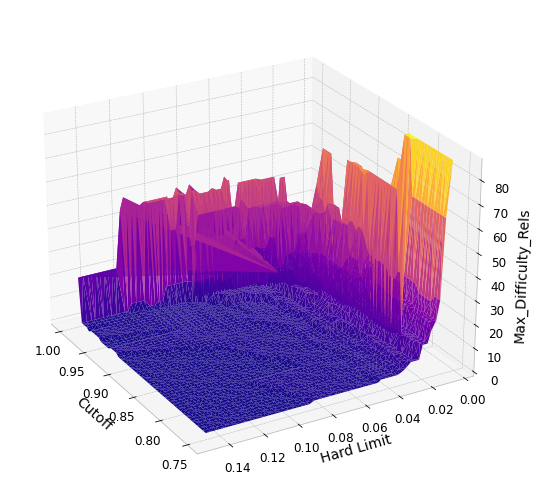

In [615]:
surface(sData2['Cutoff'], sData2['Hard_Limit'], sData2['Max_Difficulty_Rels'],
        xlabel='Cutoff', ylabel="Hard Limit",zlabel='Max_Difficulty_Rels', ang=150,
        filename='cutoff_vs_hard_rels')

In [541]:
sData3 = df.loc[(df['Cutoff'] == 0.9)]


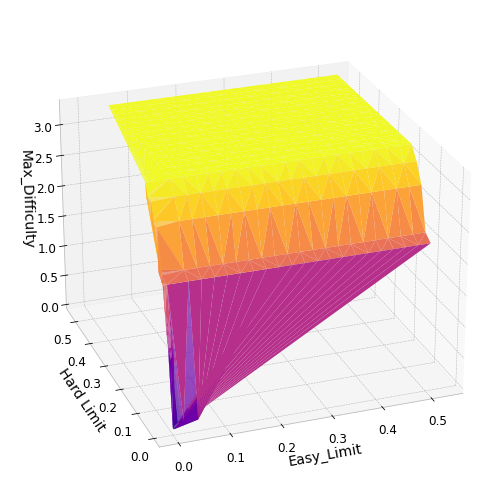

In [542]:
surface(sData3['Easy_Limit'], sData3['Hard_Limit'], sData3['Max_Difficulty'],
        xlabel='Easy_Limit', ylabel="Hard Limit",zlabel='Max_Difficulty', ang=250,
        filename='cutoff_vs_hard_diff')

In [543]:
from matplotlib import cm   

def surface2(x,y,z, xlabel='', ylabel='', zlabel='', ang = 300, filename=None, c = False):
    # plt.rcParams['figure.figsize'] = [12, 9]
    # plt.style.use('bmh')
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    
    if c is False: # no color variable specified
        surf = ax.plot_trisurf(x, y, z, cmap=cm.plasma, linewidth=0, antialiased=True)
        
    else: # color var used
#         surf = ax.plot_trisurf(x, y, z, cmap=cm.plasma, linewidth=0, antialiased=True, color = cm.jet(color_var/np.amax(color_var)))
#         c = c/c.max()
        surf = ax.plot_trisurf(x, y, z, facecolors=cm.jet(c)) #acecolors = cm.jet(color_var))
   
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_zlabel(zlabel, fontsize=14)
    ax.view_init(elev=25., azim= ang)
    fig.patch.set_facecolor('blue')  # Will change background color
    # fig.patch.set_alpha(0.0)
    ax.set(facecolor='w')
    fig.set(facecolor='w')

    if filename is not None:
        plt.savefig(filename + '.png', transparent=True)

    plt.show()

In [544]:
c = sData2['Max_Difficulty_Rels']
c.describe()

count    3201.000000
mean        7.262418
std        13.520026
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        87.000000
Name: Max_Difficulty_Rels, dtype: float64

In [545]:
c = c/c.max()
c

9        0.022989
10       0.022989
12       0.022989
17       0.045977
20       0.011494
           ...   
11578    0.011494
11582    0.022989
11583    0.436782
11586    0.022989
11592    0.114943
Name: Max_Difficulty_Rels, Length: 3201, dtype: float64

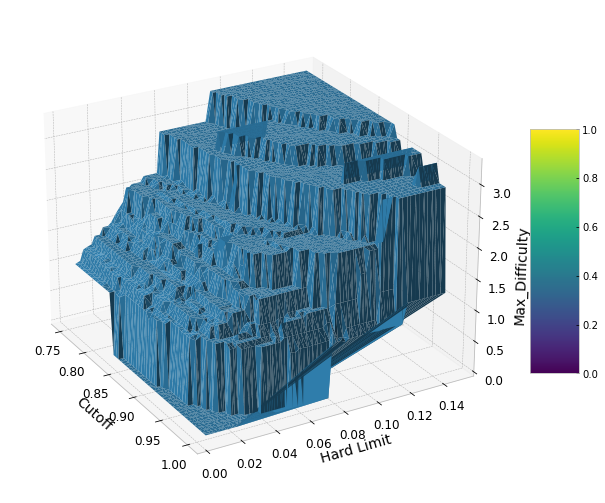

In [546]:
surface2(sData2['Cutoff'], sData2['Hard_Limit'], sData2['Max_Difficulty'], c = sData2['Max_Difficulty_Rels'],
        xlabel='Cutoff', ylabel="Hard Limit",zlabel='Max_Difficulty', ang=330,
        filename='cutoff_vs_hard_diff')